In [428]:
%load_ext autoreload
%autoreload 2

import functions.add_path

import functions.plotnine_theme
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from plotnine import *
from plotnine.data import *

import functions.et_condition_df as condition_df
import functions.et_make_df as  make_df

import be_load
import os
print(os.getcwd())
if os.getcwd()[-4:] != 'code':
    try:
        os.chdir('./code')
    except:
        os.chdir('/net/store/nbp/users/behinger/projects/etcomp/code')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/net/store/nbp/users/behinger/projects/etcomp/code


In [3]:
(etsamples,etmsgs,etevents) = be_load.load_data()

loading subject VP1 with et el
loading subject VP1 with et pl
loading subject VP2 with et el
loading subject VP2 with et pl
loading subject VP3 with et el
loading subject VP3 with et pl
loading subject VP4 with et el
loading subject VP4 with et pl
loading subject VP11 with et el
loading subject VP11 with et pl
loading subject VP12 with et el
loading subject VP12 with et pl
loading subject VP14 with et el
loading subject VP14 with et pl
loading subject VP15 with et el
loading subject VP15 with et pl
loading subject VP19 with et el
loading subject VP19 with et pl
loading subject VP20 with et el
loading subject VP20 with et pl
loading subject VP22 with et el
loading subject VP22 with et pl
loading subject VP23 with et el
loading subject VP23 with et pl
loading subject VP24 with et el
loading subject VP24 with et pl
loading subject VP25 with et el
loading subject VP25 with et pl
loading subject VP26 with et el
loading subject VP26 with et pl
loading subject results with et el
File b'/net/s

In [227]:
condquery = 'condition == "DILATION" & exp_event=="lum"'
td = [-1, 12]
subject = 'VP1'
eyetracker='pl'
query = 'subject==@subject& eyetracker==@eyetracker'

lum_epoch = make_df.make_epochs(etsamples.query(query),etmsgs.query(query+'&'+condquery), td=td)

#normalize by SD division. Could be made better e.g. by quantile division
def lum_standardize(df):
    #df.loc[:,"pa_norm"] = lum_epoch.pa/scipy.stats.iqr(lum_epoch.pa)
    if np.sum(df.td<0)==0:
        print('trial has no baseline')
        df.loc[:,"pa_norm"] = np.nan
    else:
        df.loc[:,"pa_norm"] = df.pa / np.median(df.loc[df.td<0,'pa'])
    return(df)
lum_epoch = lum_epoch.groupby(["msg_time"],as_index=False).apply(lambda rows:lum_standardize(rows))


msg 0 from 48


In [229]:
# bsaeline correction
lum_epoch.iloc[1:2]

,gy,gx,smpl_time,pa,gx_vel,gy_vel,type,confidence,outside,zero_pa,neg_time,blink_id,algorithm,eyetracker,subject,...,grid_size,lum,msg_time,pic_id,posx,posy,shake_x,shake_y,trial,vel,algorithm,eyetracker,subject,beep,pa_norm
1198541,-3.770815,-3.886718,392.943553,4198.51962,NaN,NaN,fixation,1.0,False,False,False,0,hmm,pl,VP1,...,NaN,0.0,393.93654,NaN,NaN,NaN,NaN,NaN,NaN,NaN,hmm,pl,VP1,NaN,0.991399


In [230]:
from scipy.stats import binned_statistic
# to plot the data correctly, we need to bin them & take means
def lum_bin_function(df):
    newtd = np.linspace(td[0],td[1],101)
    binned = binned_statistic(x=df.td,values=df.pa_norm,statistic="mean",bins=newtd)    
    
    return(pd.DataFrame({"td":newtd[1:]-(newtd[1]-newtd[0])/2,"pa_norm":binned[0],"lum":df.lum.iloc[0]}))
lum_epoch_binned = lum_epoch.groupby("lum",as_index=False).apply(lambda rows: lum_bin_function(rows))

In [231]:
lum_epoch.describe()
lum_epoch.iloc[0:1]

,gy,gx,smpl_time,pa,gx_vel,gy_vel,type,confidence,outside,zero_pa,neg_time,blink_id,algorithm,eyetracker,subject,...,grid_size,lum,msg_time,pic_id,posx,posy,shake_x,shake_y,trial,vel,algorithm,eyetracker,subject,beep,pa_norm
1198540,-3.76735,-3.852275,392.939353,4226.931024,NaN,NaN,fixation,1.0,False,False,False,0,hmm,pl,VP1,...,NaN,0.0,393.93654,NaN,NaN,NaN,NaN,NaN,NaN,NaN,hmm,pl,VP1,NaN,0.998108


/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/plotnine/layer.py:452: UserWarning: geom_point : Removed 184 rows containing missing values.
  self.data = self.geom.handle_na(self.data)
/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/plotnine/layer.py:452: UserWarning: geom_vline : Removed 1 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


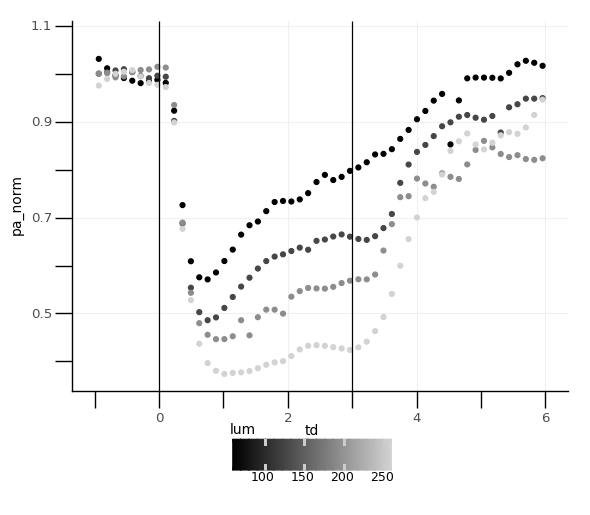

<ggplot: (-9223363250106515463)>

In [232]:
(ggplot(lum_epoch_binned.query('lum>0'),aes(x='td',y='pa_norm',color='lum'))
            +geom_point() 
            +geom_vline(xintercept=[0,3,10] )
            +scale_color_gradient(low='black',high='lightgray')+xlim((-1,6))
)
            #facet_wrap('~eyetracker') 

In [9]:
condquery = 'condition == "DILATION" & exp_event=="lum"'
td = [2,3]


full_lum_epoch = make_df.make_epochs(etsamples,etmsgs.query(condquery), td=td)

In [20]:
full_lum_epoch = full_lum_epoch.iloc[:,:-4] # removes the two double "subject" and "eyetracker" columns

In [33]:
full_lum_epoch = full_lum_epoch.reset_index()

In [35]:
tmp = full_lum_epoch.groupby(["eyetracker","subject"],as_index=False).apply(lambda row:row.pa/scipy.stats.iqr(row.pa))

In [37]:
full_lum_epoch.loc[:,'pa_norm'] = tmp.values

In [94]:
full_lum_epoch.subject.unique()

array(['VP1', 'VP2', 'VP12', 'VP19', 'VP20', 'VP22', 'VP25', 'VP26'],
      dtype=object)

In [233]:
import LUM

In [ ]:
single_lum = LUM.process_lum_singlesub(etsamples=etsamples,etmsgs=etmsgs,eyetracker="el",subject="VP1")

In [251]:
single_lum.columns
all_lum.columns

Index(['gy', 'gx', 'smpl_time', 'pa', 'gx_vel', 'gy_vel', 'type', 'confidence',
       'outside', 'zero_pa', 'neg_time', 'blink_id', 'algorithm', 'eyetracker',
       'subject', 'td', 'angle', 'block', 'condition', 'element', 'exp_event',
       'grid_size', 'lum', 'msg_time', 'pic_id', 'posx', 'posy', 'shake_x',
       'shake_y', 'trial', 'vel', 'beep', 'pa_norm'],
      dtype='object')

In [245]:
all_lum = LUM.process_lum(etsamples,etmsgs)

In [429]:
all_lum_binned = LUM.bin_lum(all_lum)

In [430]:
all_lum_binned.iloc[0:1]

,,block,eyetracker,lum,pa_norm,subject,td
0,0,1.0,el,0.0,0.983075,VP1,-0.935


In [433]:
all_lum_binned_noblock = all_lum_binned.groupby(["td","eyetracker","subject","lum"],as_index=False).agg("mean")

/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/plotnine/layer.py:363: UserWarning: stat_summary : Removed 5520 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/plotnine/layer.py:452: UserWarning: geom_vline : Removed 1 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


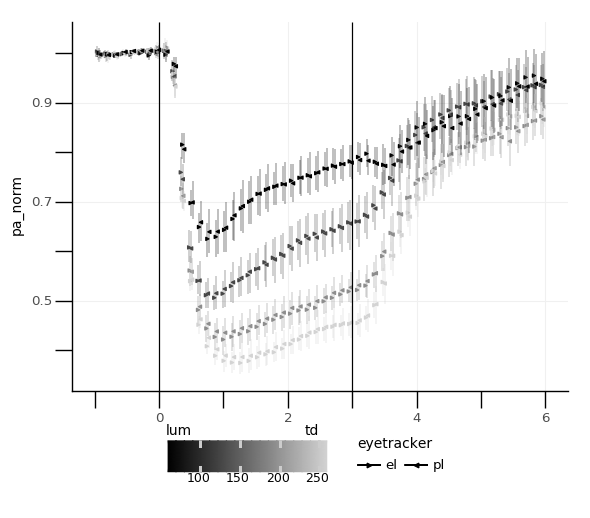

<ggplot: (8786777533686)>

In [434]:
all_lum_binned_noblock.loc[:,'plot_grouping'] = all_lum_binned_noblock.eyetracker + all_lum_binned_noblock.lum.map(str)
(ggplot(all_lum_binned_noblock.query('lum>0'),aes(x='td',y='pa_norm',group="plot_grouping",color="lum",shape="eyetracker"))
            +stat_summary(position=position_dodge(width=0.06),size=0.2) 
            #+stat_summary()
            +geom_vline(xintercept=[0,3,10] )
            +scale_color_gradient(low='black',high='lightgray')+xlim((-1,6))
            +scale_shape_manual(values=[">","<"])
)

/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/plotnine/geoms/geom_path.py:75: UserWarning: geom_path: Removed 46 rows containing missing values.
  warn(msg.format(n1-n2))
/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/plotnine/layer.py:452: UserWarning: geom_vline : Removed 1 rows containing missing values.
  self.data = self.geom.handle_na(self.data)
/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/plotnine/guides/guides.py:200: UserWarning: Cannot generate legend for the 'shape' aesthetic. Make sure you have mapped a variable to it
  "variable to it".format(output))


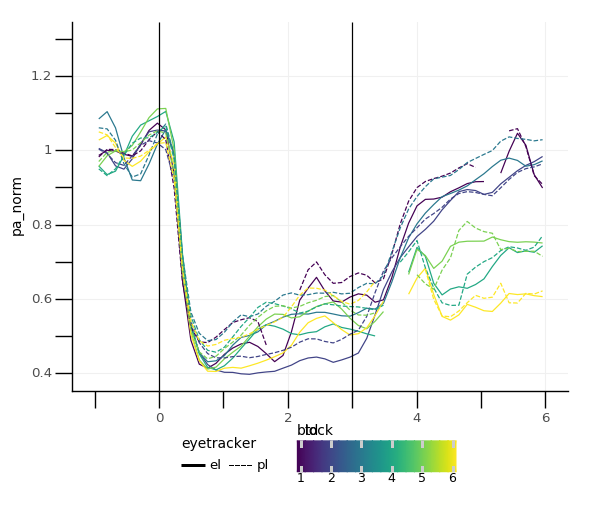

<ggplot: (8786814064392)>

In [497]:
all_lum_binned.loc[:,'plot_grouping'] = all_lum_binned.eyetracker + all_lum_binned.lum.map(str)+all_lum_binned.block.map(str)
(ggplot(all_lum_binned.query('lum==255&subject=="VP19"'),aes(x='td',y='pa_norm',group="plot_grouping",color="block",linetype="eyetracker"))
            +geom_line()
            +xlim((-1,6))
            #+stat_summary()
            +geom_vline(xintercept=[0,3,10] )
            +scale_shape_manual(values=[">","<"])
)

In [490]:
all_lum_binned = all_lum_binned.reset_index()

In [548]:
all_lum_diff = all_lum_binned.groupby(["td","lum","block","subject"],as_index=False).pa_norm.agg(np.diff)
all_lum_diff.loc[:,'pa_norm'] = pd.to_numeric(all_lum_diff.loc[:,'pa_norm'])

In [ ]:
all_lum_diff.loc[:,'plot_grouping'] = all_lum_diff.lum.map(str)
(ggplot(all_lum_diff,aes(x='td',y='pa_norm',fill="lum",color="lum",group="plot_grouping"))
            +stat_summary(geom="ribbon",alpha=.3)
            +stat_summary(geom="line")
            #
            +geom_vline(xintercept=[0,3,10] )
            +scale_color_gradient(low='black',high='lightgray')
             +xlim((-1,6))
             +scale_fill_gradient(low='black',high='lightgray')
            +ylab("Eyetracker difference in pupilsize")
            +scale_shape_manual(values=[">","<"])
             +facet_wrap("~subject")
)

/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/plotnine/scales/scales.py:28: UserWarning: Scale for 'x' is already present.
Adding another scale for 'x',
which will replace the existing scale.

  warn(_TPL_DUPLICATE_SCALE.format(ae))
/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/plotnine/layer.py:363: UserWarning: stat_summary : Removed 22698 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/plotnine/layer.py:363: UserWarning: stat_summary : Removed 22698 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/plotnine/layer.py:452: UserWarning: geom_vline : Removed 1 rows containing missing values.
  self.data = self.geom.handle_na(self.data)
/ne

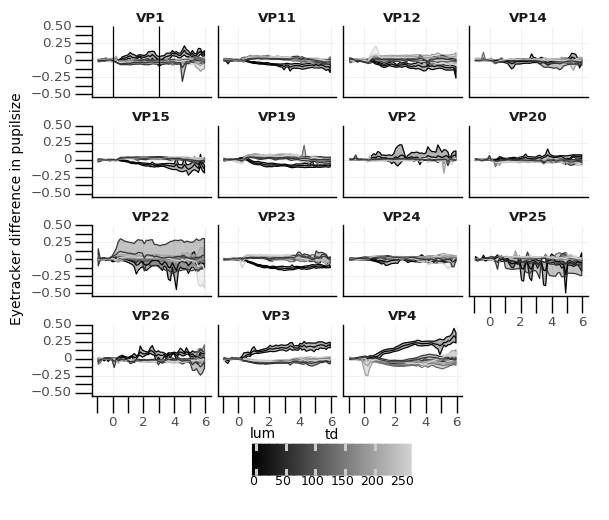

<ggplot: (-9223363250103878638)>

/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/plotnine/geoms/geom_path.py:75: UserWarning: geom_path: Removed 46 rows containing missing values.
  warn(msg.format(n1-n2))
/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/plotnine/layer.py:452: UserWarning: geom_vline : Removed 1 rows containing missing values.
  self.data = self.geom.handle_na(self.data)
/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/plotnine/guides/guides.py:200: UserWarning: Cannot generate legend for the 'shape' aesthetic. Make sure you have mapped a variable to it
  "variable to it".format(output))


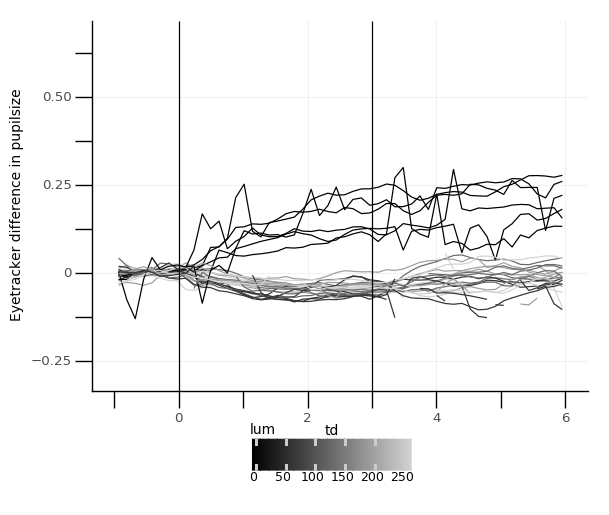

<ggplot: (8786750022278)>

In [559]:

all_lum_diff.loc[:,'plot_grouping'] = all_lum_diff.block.map(str) + all_lum_diff.lum.map(str)
(ggplot(all_lum_diff.query("subject=='VP3'"),aes(x='td',y='pa_norm',color="lum",group="plot_grouping"))
            +geom_line()
            #+stat_summary()
            +geom_vline(xintercept=[0,3,10] )
            +scale_color_gradient(low='black',high='lightgray')+xlim((-1,6))
            +ylab("Eyetracker difference in pupilsize")
            +scale_shape_manual(values=[">","<"])
)

In [310]:
all_lum.iloc[1:2]

,gy,gx,smpl_time,pa,gx_vel,gy_vel,type,confidence,outside,zero_pa,neg_time,blink_id,algorithm,eyetracker,subject,...,condition,element,exp_event,grid_size,lum,msg_time,pic_id,posx,posy,shake_x,shake_y,trial,vel,beep,pa_norm
1198541,-3.770815,-3.886718,392.943553,4198.51962,NaN,NaN,fixation,1.0,False,False,False,0,hmm,pl,VP1,...,DILATION,NaN,lum,NaN,0.0,393.93654,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.991399


In [314]:
mean_lum = all_lum.query("td>2 & td<=3").groupby(["lum","block","subject","eyetracker","msg_time"],as_index=False).pa_norm.agg("mean")

/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/plotnine/layer.py:363: UserWarning: stat_summary : Removed 2 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/plotnine/layer.py:452: UserWarning: geom_point : Removed 2 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


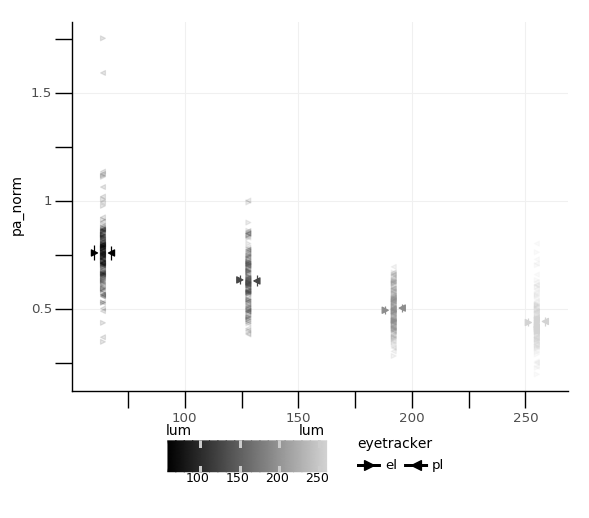

<ggplot: (8786814146010)>

In [348]:
(ggplot(mean_lum.query("lum>0"),aes(x="lum",y="pa_norm",shape="eyetracker",color="lum"))
 +stat_summary(position=position_dodge(width=15))
 +geom_point(alpha=0.1)
 +scale_color_gradient(low='black',high='lightgray')
 +scale_shape_manual(values=[">","<"])
)

In [374]:
diff_lum = mean_lum.query("lum>0").groupby(["lum","block","subject"],as_index=False).pa_norm.agg(np.diff)

In [390]:
diff_lum.loc[:,'pa_norm'] = pd.to_numeric(diff_lum.loc[:,'pa_norm'])

/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/plotnine/layer.py:363: UserWarning: stat_summary : Removed 10 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/plotnine/layer.py:452: UserWarning: geom_jitter : Removed 10 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


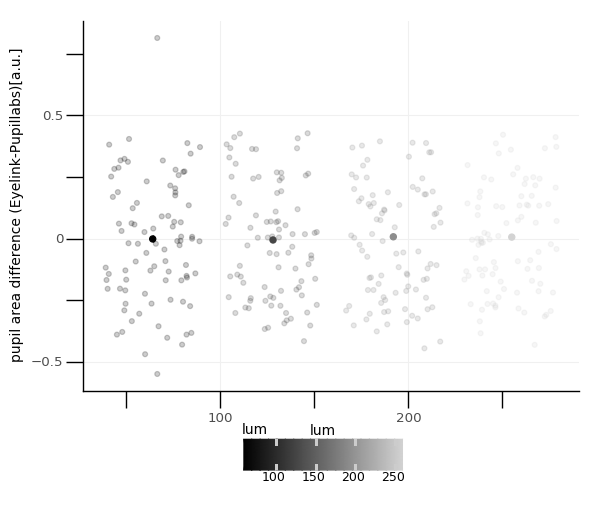

<ggplot: (8786765586429)>

In [415]:
(ggplot(diff_lum,aes(x="lum",y="pa_norm",color="lum"))
 +stat_summary(position=position_dodge(width=0.5))
 +geom_jitter(alpha=0.2)
 +scale_color_gradient(low='black',high='lightgray')
 +ylab('pupil area difference (Eyelink-Pupillabs)[a.u.]')
 #+scale_shape_manual(values=[">","<"])
)

/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/plotnine/layer.py:363: UserWarning: stat_summary : Removed 10 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


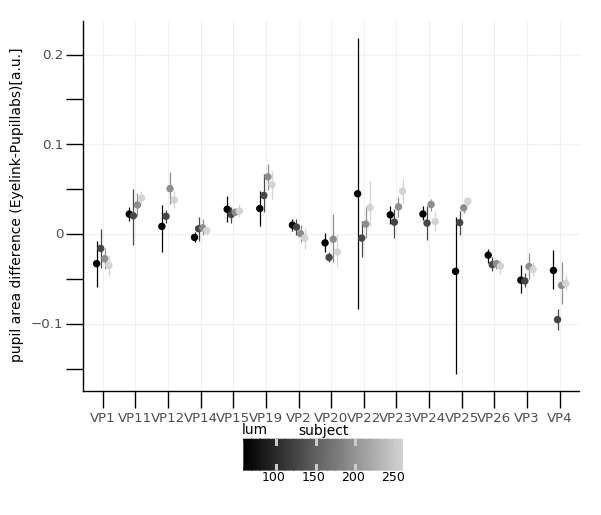

<ggplot: (-9223363250077232952)>

In [411]:
(ggplot(diff_lum,aes(x="subject",y="pa_norm",color="lum",group="lum"))
 +stat_summary(position=position_dodge(width=0.5))
 #+geom_point(alpha=0.2,position=position_dodge(width=0.5))
 +scale_color_gradient(low='black',high='lightgray')
 +ylab('pupil area difference (Eyelink-Pupillabs)[a.u.]')
 #+scale_shape_manual(values=[">","<"])
)

In [346]:
from pymer4.models import Lmer
# generally it was not possible to include the "block" estimation (e.g. ||subject/block) as the model did not converge then
mres = Lmer('pa_norm~1+eyetracker*factor(lum)+(1+factor(lum)*eyetracker||subject)',mean_lum.query("pa_norm==pa_norm")) # query to remove NANs because they are not really handled by pymer4
#mres = Lmer('pa_norm~1+factor(lum)+(1+factor(lum)||subject)',data=mean_lum.query("pa_norm==pa_norm"))

In [347]:
mres.fit()

Model failed to converge with max|grad| = 0.00228495 (tol = 0.002, component 1) 

[1] "maxfun < 10 * length(par)^2 is not recommended."
 

Formula: pa_norm~1+eyetracker*factor(lum)+(1+factor(lum)*eyetracker||subject)

Family: gaussian	 Inference: parametric

Number of observations: 1422	 Groups: {'subject': 15.0}

Log-likelihood: -333.904 	 AIC: 667.807

Random effects:

                                  Name    Var    Std
subject                    (Intercept)  0.000  0.000
subject.1                 factor(lum)0  0.000  0.002
subject.1                factor(lum)64  0.000  0.001
subject.1               factor(lum)128  0.000  0.001
subject.1               factor(lum)192  0.000  0.001
subject.1               factor(lum)255  0.000  0.000
subject.2                 eyetrackerel  0.000  0.000
subject.2                 eyetrackerpl  0.000  0.000
subject.3    factor(lum)0:eyetrackerel  0.009  0.097
subject.3   factor(lum)64:eyetrackerel  0.001  0.028
subject.3  factor(lum)128:eyetrackerel  0.0

,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),1.578,1.520,1.636,0.030,14.280,53.464,0.000,***
eyetrackerpl,0.001,-0.048,0.051,0.025,19.911,0.054,0.957,
factor(lum)64,-0.818,-0.912,-0.725,0.048,19.139,-17.108,0.000,***
factor(lum)128,-0.943,-1.045,-0.841,0.052,17.526,-18.145,0.000,***
factor(lum)192,-1.084,-1.180,-0.988,0.049,18.300,-22.119,0.000,***
factor(lum)255,-1.141,-1.233,-1.049,0.047,20.267,-24.331,0.000,***
eyetrackerpl:factor(lum)64,-0.002,-0.105,0.100,0.052,69.068,-0.041,0.967,
eyetrackerpl:factor(lum)128,-0.007,-0.111,0.097,0.053,55.153,-0.136,0.893,
eyetrackerpl:factor(lum)192,0.008,-0.095,0.112,0.053,53.732,0.152,0.880,
eyetrackerpl:factor(lum)255,0.003,-0.100,0.107,0.053,55.436,0.062,0.951,
